<a href="https://colab.research.google.com/github/aizatulin69/goit-ds-hw-14/blob/main/Hw14_RRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [9]:
max_features = 10000
maxlen = 500
batch_size = 32

In [10]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    input_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3
)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 186ms/step - acc: 0.5566 - loss: 0.6706 - val_acc: 0.7343 - val_loss: 0.5316
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 188ms/step - acc: 0.7919 - loss: 0.4484 - val_acc: 0.8359 - val_loss: 0.3851
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - acc: 0.8615 - loss: 0.3360 - val_acc: 0.8059 - val_loss: 0.4387
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - acc: 0.8948 - loss: 0.2682 - val_acc: 0.8349 - val_loss: 0.3920
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 186ms/step - acc: 0.9105 - loss: 0.2324 - val_acc: 0.8183 - val_loss: 0.4095


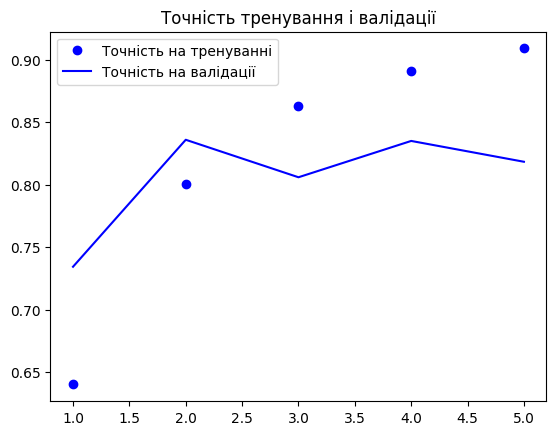

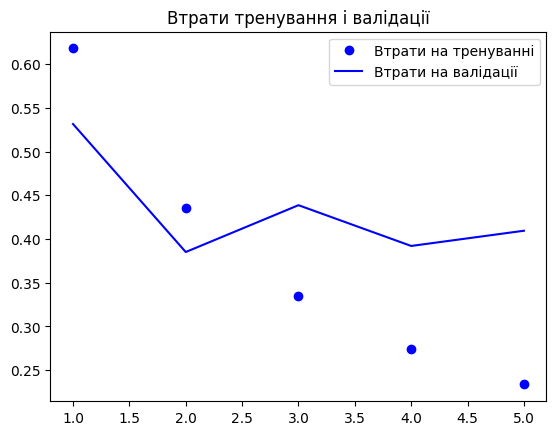

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [15]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - acc: 0.8155 - loss: 0.4074
Test Loss: 0.40274474024772644
Test Accuracy: 0.8176800012588501
